# COMPTE RENDU TP 3: RESTAURATION D'IMAGE A L'AIDE DE L'ADMM

## 1. Altération d'une image:

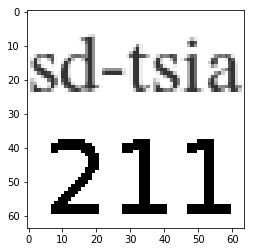

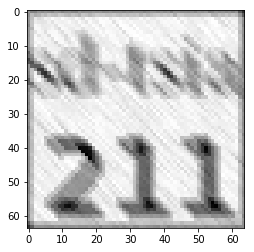

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import cg

# Ouvrir des données stockées dans un fichier .pk
data = pickle.load(open('data2018.pk', 'rb'))
# Charger par exemple la matrice H
H = data.get('H').toarray()

original = data.get('original')
observations = data.get('observations')
x_original = np.reshape(original, (64**2, 1))
y = np.reshape(observations, (64**2, 1))

# Sauvegarder des données dans un fichier .pk
pickle.dump({'data': data, 'H': H}, open(
    'testQ1.pk', 'wb'), pickle.HIGHEST_PROTOCOL)
plt.imshow(data['original'], cmap='gray')
plt.show()
plt.imshow(data['observations'], cmap='gray')
plt.show()

## 2.Restauration d'image:

**Préparation1:**

soit $z=([z_1^T,z_2^T]^T)$ le problème 3 s'écrit: $$ \underset{\mathbf{x}}{\text{min}}\frac{1}{2}||y-Hx||_2^2+\beta||Tx||_1+\iota_{[0,1]^P}(x)$$
$$ =\underset{\mathbf{x}}{\text{min}}\frac{1}{2}||y-Hx||_2^2+\beta||z_2||_1+\iota_{[0,1]^P}(z_1)$$
soit $g(z)=\beta||z_1||_1+\iota_{[0,1]^P}(z_2)$ et $f(x)=\frac{1}{2}||y-Hx||_2^2$ on pose 
$$A=\begin{pmatrix}
\mathbf{I}_{P} \\
\mathbf{T}
\end{pmatrix}$$
on a alors: $Ax=\begin{pmatrix}
\mathbf{x} \\
\mathbf{Tx}
\end{pmatrix}=\begin{pmatrix}
\mathbf{z_1} \\
\mathbf{z_2}
\end{pmatrix}$=$z$

Finalement le problème est équivalent à : $$ \underset{\mathbf{x}}{\text{min }} f(x)+g(z)$$ $$s.c:Ax=z$$

**Préparation2:**

on a $\gamma=[\gamma_1,\gamma_2]^T$

Le Lagrangien s'écrit donc:
$$\mathcal{L}_{\rho}(x,z,\gamma)=\frac{1}{2}||{y}-Hx||_2^2 + \beta||z_{2}||_1 + \iota_{[0,1]^P}(z_{1})+\gamma^{T}(Ax-z)+\frac{\rho}{2}||Ax - z||^2_2 \\ = \frac{1}{2}||{y}-Hx||_2^2 + \beta||z_{2}||_1 + \iota_{[0,1]^P}(z_{1})+\gamma_1^{T}(x-z_1)+\gamma_2^{T}(Tx-z_2)+\frac{\rho}{2}||x - z_1||^2_2+\frac{\rho}{2}||Tx - z_2||^2_2 $$


**Préparation3:**

étant donnée que: $$x^{k+1}\in \underset{\mathbf{x}}{\text{argmin }}\mathcal{L}_{\rho}(x,z^k,\gamma^k) $$

D'après le théorème de Fermat: $0 \in \partial{\mathcal{L}}=\{{\nabla_x\mathcal{L}_{\rho}(x,z,\gamma) }\}$ c'est à dire:$\nabla_x\mathcal{L}_{\rho}(x,z,\gamma)=0$

or :$$\nabla_x\mathcal{L}_{\rho}(x,z,\gamma)=H^T(Hx-y)+\gamma_1+T^T\gamma_2+\rho(x-z_1)+\rho T^T(Tx-z_2)$$
$$=(H^TH+\rho I_p+T^TT)x-(H^Ty+\rho z_1+\rho T^Tz_2-\gamma_1-T^T \gamma_2 )= 0$$

et donc $$x^{k+1}=(H^TH+\rho I_p+T^TT)^{-1}(H^Ty+\rho z_1^k+\rho T^Tz_2^k-\gamma_1^k-T^T \gamma_2^k )$$

**Préparation 4:**

on a :

$$z_1^{k+1} \in argmin_{z_1} \iota_{[0,1]^p}(z_1) - \gamma_1^T z_1 +\frac{\rho}{2}||x^{k+1}-z_1||_2^2$$

$$z_2^{k+1} \in argmin_{z_2} \beta ||z_2||_1 -\gamma_2^T z_2+\frac{\rho}{2}||Tx^{k+1}-z_2||_2^2$$

Soit $z_1=[z_{1,1},z_{1,2},...,z_{1,n}]^T$ et $\gamma_1=[\gamma_{1,1},\gamma_{1,2},...,\gamma_{1,n}]^T $ on a :

$$\iota_{[0,1]^p}(z_1) - \gamma_1^T z_1 +\frac{\rho}{2}||x^{k+1}-z_1||_2^2 = \sum_{i=1}^n \iota_{[0,1]}(z_{1,i}) - \gamma_{1,i}z_{1,i}+\frac{\rho}{2}((x^{k+1})_i-z_{1,i})^2$$ 


Et soit $z_2=[z_{2,1},z_{2,2},...,z_{2,n}]^T$ et $\gamma_2=[\gamma_{2,1},\gamma_{2,2},...,\gamma_{2,n}]^T $ on a donc : 

$$ \beta ||z_2||_1 -\gamma_2^T z_2+\frac{\rho}{2}||Tx^{k+1}-z_2||_2^2 = \beta\sum_{i=1}^n |z_{2,i}| - \sum_{i=1}^n\gamma_{2,i}z_{2,i} +\frac{\rho}{2}\sum_{i=1}^n ((Tx^{k+1})_i-z_{2,i})^2
=\sum_{i=1}^n \beta|z_{2,i}|-\gamma_{2,i}z_{2,i}+\frac{\rho}{2}((Tx^{k+1})_i-z_{2,i})^2$$

On voit ici que l'expression qu'on cherche à minimiser est une fonction séparable donc cherhcer $z_1$ qui minimiser l'expression  revient à chercher tout les $z_{1,i}$ $\forall i \in \{1..n\}$ qui minimise $  \iota_{[0,1]}(z_{1,i}) - \gamma_{1,i}z_{1,i}+\frac{\rho}{2}((x^{k+1})_i-z_{1,i}) $ 

de meme chercher $z_2$ revient à chercher tous les $z_{2,i}$ qui minimise $\beta|z_{2,i}|-\gamma_{2,i}z_{2,i}+\frac{\rho}{2}((Tx^{k+1})_i-z_{2,i})^2$ 

Finalement:

$\forall i\in\{1,...,n\}$  $$z_{2,i}^{k+1} \in argmin_{z_{2,i}}  \beta|z_{2,i}|-\gamma_{2,i}z_{2,i}+\frac{\rho}{2}((Tx^{k+1})_i-z_{2,i})^2$$

$$z_{1,i}^{k+1} \in argmin_{z_{1,i}} \iota_{[0,1]}(z_{1,i}) - \gamma_{1,i}z_{1,i}+\frac{\rho}{2}((x^{k+1})_i-z_{1,i})^2$$


**Cherchons $ z_{1,i}^{k+1}$ ** :

Soit $f(z)=\iota_{[0,1]}(z)+\frac{\rho}{2}(z-(x^{k+1})_i+\frac{\gamma_{1,i}}{\rho})^2$

* Si $(x^{k+1})_i+\frac{\gamma_{1,i}}{\rho}\in [0,1]$ alors $f$ est minimale lorsque $z=(x^{k+1})_i+\frac{\gamma_{1,i}}{\rho}$

* Si $(x^{k+1})_i+\frac{\gamma_{1,i}}{\rho}>1$ alors $f$ atteint sont minimum pour $z=1$

* Si $(x^{k+1})_i+\frac{\gamma_{1,i}}{\rho}<0$ alors $f$ atteint sont minimum pour $z=0$

Finalement: $$z_{1,i}^{k+1}=\min(1,max(0,(x^{k+1})_i+\frac{\gamma_{1,i}}{\rho}))$$

**Cherchons $ z_{2,i}^{k+1}$ :**

Soit $g(z) = \beta|z| -\gamma_{2,i} z +\frac{\rho}{2}((Tx^{k+1})_i-z)^2$

* Si $z\geq 0$ alors $ g'(z)=(\beta - \gamma_{2,i})-\rho((Tx^{k+1})_i-z) = \rho z -\rho (Tx^{k+1})_i+\beta-\gamma_{2,i}$.

* Si $-\rho (Tx^{k+1})_i+\beta-\gamma_{2,i}<0\Leftrightarrow \beta<\gamma_{2,i}+\rho(Tx^{k+1})_i$ alors le minimum de $g$ sur $z\geq 0$ est atteint pour $z=(Tx^{k+1})_i +\frac{\gamma_{2,i}-\beta}{\rho}$, sinon le minimum est atteint pour $z=0$.

* Si $z<0$ alors $g'(z)=(-\beta - \gamma_{2,i})-\rho((Tx^{k+1})_i-z) = \rho z -\rho (Tx^{k+1})_i-\beta-\gamma_{2,i}$.

* Si $-\rho (Tx^{k+1})_i-\beta-\gamma_{2,i}>0\Leftrightarrow \beta<-\gamma_{2,i}-\rho(Tx^{k+1})_i$ alors le minimum de $g$ sur $z<0$ est atteint pour $z=(Tx^{k+1})_i +\frac{\gamma_{2,i}+\beta}{\rho}$, sinon le minimum est atteint pour $z=0$.

Comme $\beta\geq 0$ alors on compare $\beta$ à $|\gamma_{2,i}+\rho(Tx^{k+1})_i|$

* Si $\beta<|\gamma_{2,i}+\rho(Tx^{k+1})_i|\Leftrightarrow 1-\frac{\beta}{|\gamma_{2,i}+\rho(Tx^{k+1})_i|}>0$ alors $z= (Tx^{k+1})_i+\frac{\gamma_{2,i}}{\rho}-\frac{\beta}{\rho}(\frac{Tx^{k+1})_i+\frac{\gamma_{2,i}}{\rho}}{|Tx^{k+1})_i+\frac{\gamma_{2,i}}{\rho}|}) = (Tx^{k+1})_i+\frac{\gamma_{2,i}}{\rho}(1-\frac{\beta}{|\gamma_{2,i}+\rho(Tx^{k+1})_i|})$ 
* sinon $z=0$, donc $z=(Tx^{k+1})_i+\frac{\gamma_{2,i}}{\rho}\max(0,1-\frac{\beta}{|\gamma_{2,i}+\rho(Tx^{k+1})_i|})$

**Conclusion : ** $$z_{2,i}^{k+1}= (Tx^{k+1})_i+\frac{\gamma_{2,i}}{\rho}\max(0,1-\frac{\beta}{|\gamma_{2,i}+\rho(Tx^{k+1})_i|})$$

**Préparation 5:**

$$\gamma_1^{k+1} = \gamma_1^k + \rho(x^{k+1} - z_1^{k+1})$$
$$\gamma_2^{k+1} = \gamma_2^k + \rho(Tx^{k+1} - z_2^{k+1})$$

## 3.Implémentation de l'ADMM pour résoudre le problèle de restauration d'image:

**Manipulation 1 : **

In [2]:

rho = 0.05
beta = 0.01
kmax = 100

T = data.get('T').toarray()
A = np.concatenate((np.eye(4096),T),axis=0)
X = np.random.random_sample((4096,1))
gamma1 = np.random.random((len(X),1))
gamma2 = np.random.random((len(T.dot(X)),1))
z1 = X
z2 = np.dot(T,X)

In [3]:
#ADMM
def ADMM(x,z1,z2,gamma1,gamma2,rho,beta,kmax):

    z=np.concatenate((z1,z2),axis=0)
    B = np.dot(np.transpose(H),H)+rho*(np.dot(np.transpose(A),A))
    
    for i in range (0,kmax):
        gamma = np.concatenate((gamma1,gamma2),axis=0)
        
        b1 = np.dot(np.transpose(H),y) - np.dot(np.transpose(A),gamma - rho*z)
        x= cg(B,b1)[0]
        x = np.reshape(x, (len(x),1))
        
        for i in range(0,len(z1)):
            z1[i] = min(1,max(0,x[i]+(1/rho)*gamma1[i]))

        z2=np.dot(T,x)
        for i in range(0,len(z2)):
            z2[i]+=(1/rho)*gamma2[i]*max(0,1-(beta/np.abs(gamma2[i]+rho*z2[i])))
        z=np.concatenate((z1, z2),axis=0)
        gamma1 += rho*(x - z1)
        gamma2 += rho*(np.dot(T,x) - z2)
        
    return x

In [4]:
x = ADMM(X,z1,z2,gamma1,gamma2,rho,beta,kmax)
x1 = np.reshape(x,(64,64))

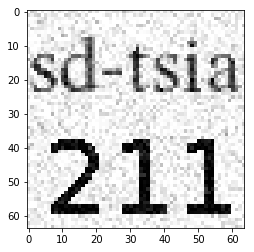

In [5]:
plt.imshow(x1, cmap='gray')
plt.show()

**Manipulation 2 : **

In [6]:
def i(x,borne_inf,borne_sup):
    p = len(x)
    for i in range (p):
        if (x[i] >= borne_inf) and (x[i] <= borne_sup):
            return 0
        else:
            return float('inf')

In [7]:
def lagrangien_augmente(x,z,z1,z2,gamma):
    l = 0.5*(np.linalg.norm(y - np.dot(H, x)))**2 + beta*np.linalg.norm(z2, ord=1) + i(z1,0,1) + np.dot(gamma.T,np.dot(A,x) - z) + (rho/2)*(np.linalg.norm(np.dot(A,x) - z))**2
    return l

In [8]:
def ADMM_lag_aug(x,z1,z2,gamma1,gamma2,rho,beta,kmax):

    z=np.concatenate((z1,z2),axis=0)
    B = np.dot(np.transpose(H),H)+rho*(np.dot(np.transpose(A),A))
    
    
    biais = [x_original - x]
    s = (np.linalg.norm(biais[0]))**2
    EQM = [s/len(x)]
    gamma = np.concatenate((gamma1,gamma2),axis=0)
    evolution = [lagrangien_augmente(x,z,z1,z2,gamma)]
    
    for i in range (0,kmax):
        
        
        b1 = np.dot(np.transpose(H),y) - np.dot(np.transpose(A),gamma - rho*z)
        x= cg(B,b1)[0]
        x = np.reshape(x, (len(x),1))
        
        for j in range(0,len(z1)):
            z1[j] = min(1,max(0,x[j]+(1/rho)*gamma1[j]))

        z2=np.dot(T,x)
        for l in range(0,len(z2)):
            z2[l]+=(1/rho)*gamma2[l]*max(0,1-(beta/np.abs(gamma2[l]+rho*z2[l])))
        z=np.concatenate((z1, z2),axis=0)
        gamma1 += rho*(x - z1)
        gamma2 += rho*(np.dot(T,x) - z2)
        gamma = np.concatenate((gamma1,gamma2),axis=0)
        evolution.append(lagrangien_augmente(x,z,z1,z2,gamma))
        biais.append(x_original - x)
        s+= (np.linalg.norm(biais[i+1]))**2

        EQM.append(s/(i+2)/len(x)) ##############
        
    evolution=np.array(evolution).reshape(len(evolution))
      
    return x,biais,evolution,EQM

In [9]:
x, biais, lag_aug_evolution, EQM = ADMM_lag_aug(X,z1,z2,gamma1,gamma2,rho,beta,kmax)

In [10]:
lag_aug_evolution

array([ 72.09687265,  26.05403436,  20.29397225,  16.37663531,
        13.45909393,  11.73602205,  10.94204596,  10.60036216,
        10.36046408,  10.09702986,   9.83857715,   9.66076357,
         9.56558092,   9.53028089,   9.52713305,   9.53933767,
         9.5573915 ,   9.58309997,   9.61344273,   9.64477417,
         9.67389284,   9.70136115,   9.72543059,   9.74546209,
         9.7615289 ,   9.77552292,   9.78775089,   9.79838377,
         9.8076095 ,   9.81601021,   9.82391342,   9.83166196,
         9.83924227,   9.84686228,   9.85434055,   9.86143872,
         9.86812302,   9.87477772,   9.88108476,   9.8872434 ,
         9.8934315 ,   9.89950987,   9.90544164,   9.91120786,
         9.91703401,   9.92284392,   9.92855072,   9.93406492,
         9.93930689,   9.94430403,   9.94907668,   9.95371025,
         9.95823956,   9.96265708,   9.96704234,   9.97147906,
         9.97575588,   9.97986343,   9.98379642,   9.98764157,
         9.99148713,   9.99526952,   9.99891945,  10.00

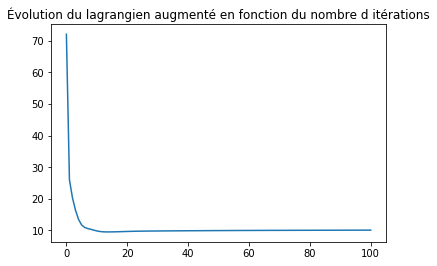

In [11]:
abcisse = range(0,kmax+1)
plt.plot(abcisse, lag_aug_evolution)
plt.title ('Évolution du lagrangien augmenté en fonction du nombre d itérations')
plt.show()

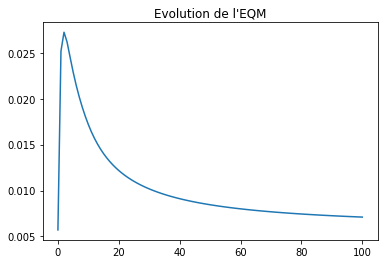

In [12]:
plt.plot(abcisse,EQM)
plt.title ('Evolution de l\'EQM')
plt.show()

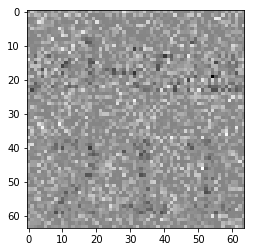

In [13]:
plt.imshow(np.reshape(biais[len(biais)-1], (64,64)),cmap='gray')
plt.show()

** Manipulation 3:**

**Influence de $\rho$:**

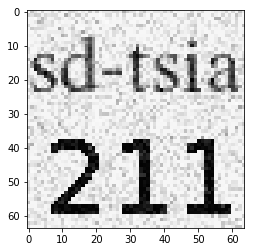

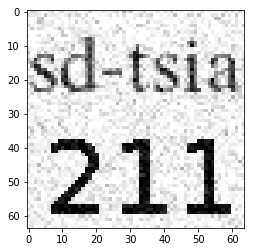

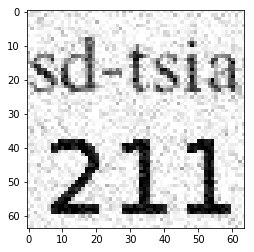

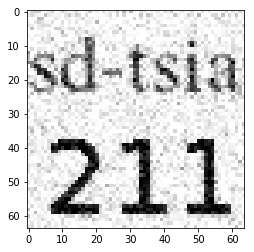

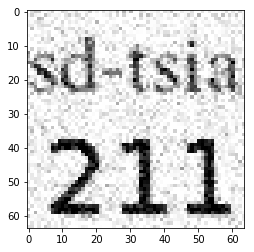

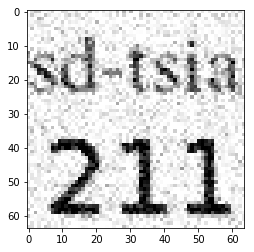

In [14]:
from time import clock
biais1 = []
Lagrangian = []
eqm = []
Temps = []
rho_val=np.linspace(1e-4,1,num=6)
for rho in rho_val:
    start = clock()
    x, biais, lag_aug_evolution, EQM = ADMM_lag_aug(X,z1,z2,gamma1,gamma2,rho,beta,kmax)
    Temps.append(clock() - start)
    biais1.append(biais[len(biais)-1])
    Lagrangian.append(lag_aug_evolution[len(lag_aug_evolution)-1])
    eqm.append(EQM[len(EQM)-1])
    x1 = np.reshape(x,(64,64))
    plt.imshow(x1, cmap='gray')
    plt.show()

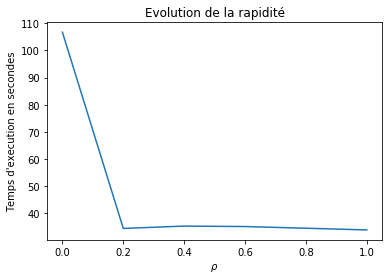

In [15]:
plt.close("all")
plt.plot(rho_val, np.asarray(Temps))
plt.xlabel(r"$\rho$")
plt.ylabel("Temps d'execution en secondes")
plt.title(r"Evolution de la rapidité")
plt.show()

- $\rho$ n'a pas d'influence visible sur  la qualité de l'image calculée
- Plus $\rho $ augmente, le temps de calcul diminue
- $\rho$ ne vise qu'à garantir la convexité du lagrangien, en donnant un degré d'importance différent au fait que $ z = Ax $

** Influence de $\beta$ : **

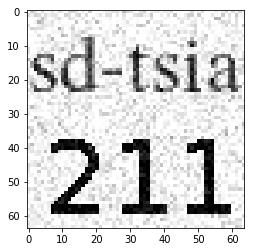

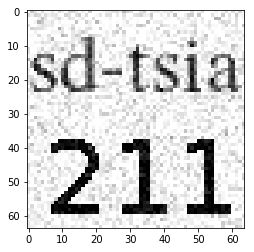

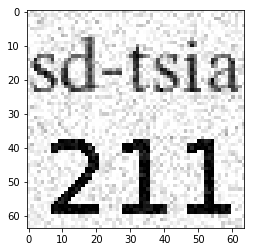

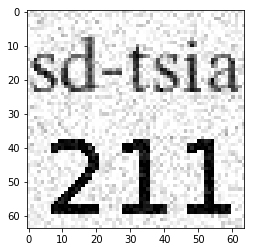

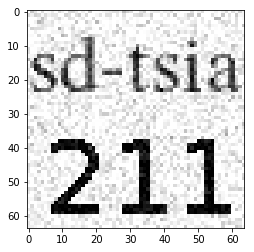

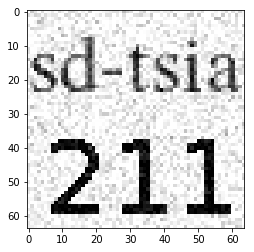

In [16]:
from time import clock
biais1 = []
Lagrangian = []
eqm = []
Temps = []
rho=0.01
beta_val=np.linspace(1e-5,1,num=6)
for beta in beta_val:
    start = clock()
    x, biais, lag_aug_evolution, EQM = ADMM_lag_aug(X,z1,z2,gamma1,gamma2,rho,beta,kmax)
    Temps.append(clock() - start)
    biais1.append(biais[len(biais)-1])
    Lagrangian.append(lag_aug_evolution[len(lag_aug_evolution)-1])
    eqm.append(EQM[len(EQM)-1])
    x1 = np.reshape(x,(64,64))
    plt.imshow(x1, cmap='gray')
    plt.show()

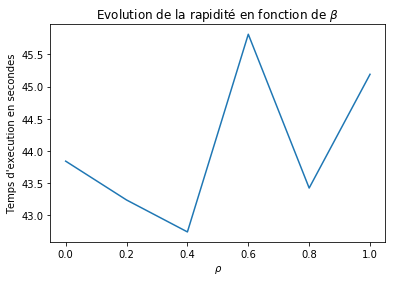

In [17]:
plt.close("all")
plt.plot(rho_val, np.asarray(Temps))
plt.xlabel(r"$\rho$")
plt.ylabel("Temps d'execution en secondes")
plt.title(r"Evolution de la rapidité en fonction de $\beta$ ")
plt.show()

- Le lagrangien est proportionnel a $\beta$, c'est a dire lorsqu'on augmente $\beta$ le lagrangien augmente et inversement
